<center><h1> Breast Cancer Prediction with KNN </h1></center>

<a id="import"></a>
# 1️⃣ㅣImport Libraries


In [1]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Mondel performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics


#warnings
import warnings
warnings.simplefilter(action='ignore')

<a id="data"></a>
# 2️⃣ㅣLoad data💾 

In [3]:
# reading data into dataframe
df = pd.read_csv('./data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
nRow, nCol= df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 569 rows and 33 columns


In [5]:
# lists name of columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Attribute Information:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)
- 3-32)

- Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)



### <a id="eda"></a>
# 3️⃣ ㅣData Preprocessing

In [6]:
#to view some basic statistical details of train data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
#lets see if we have any duplicated entries and the result shows that all entries are unique
df.duplicated().sum()

np.int64(0)

In [8]:
#getting some information about the datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
## printing total numbers of Unique value in the dataframe. 
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [10]:
# Find the total number of missing values in the dataframe
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# Drop the "Unnamed: 32" column containing all null values  and id column
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

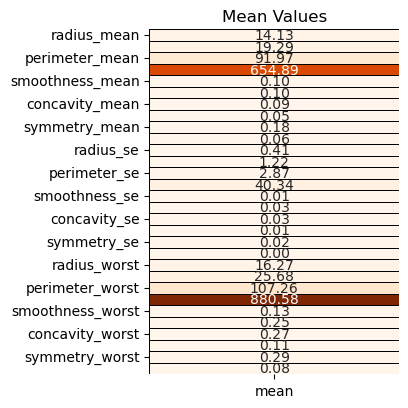

In [12]:
#mean value 
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(df.describe().T[['mean']],
            cmap = 'Oranges',
            annot = True,
            fmt = '.2f',
            linecolor = 'black',
            linewidths = 0.4,
            cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)
plt.show()

In [13]:
# categorical and numerical features
col = list(df.columns)
col.remove('diagnosis')
categorical_features = ['diagnosis']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : diagnosis
Numerical Features : radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst


In [14]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [15]:
# 1 : M and 0 : B
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis'] 


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### <a id="eda"></a>
# 4️⃣ㅣExploratory Data Analysis (EDA)📊

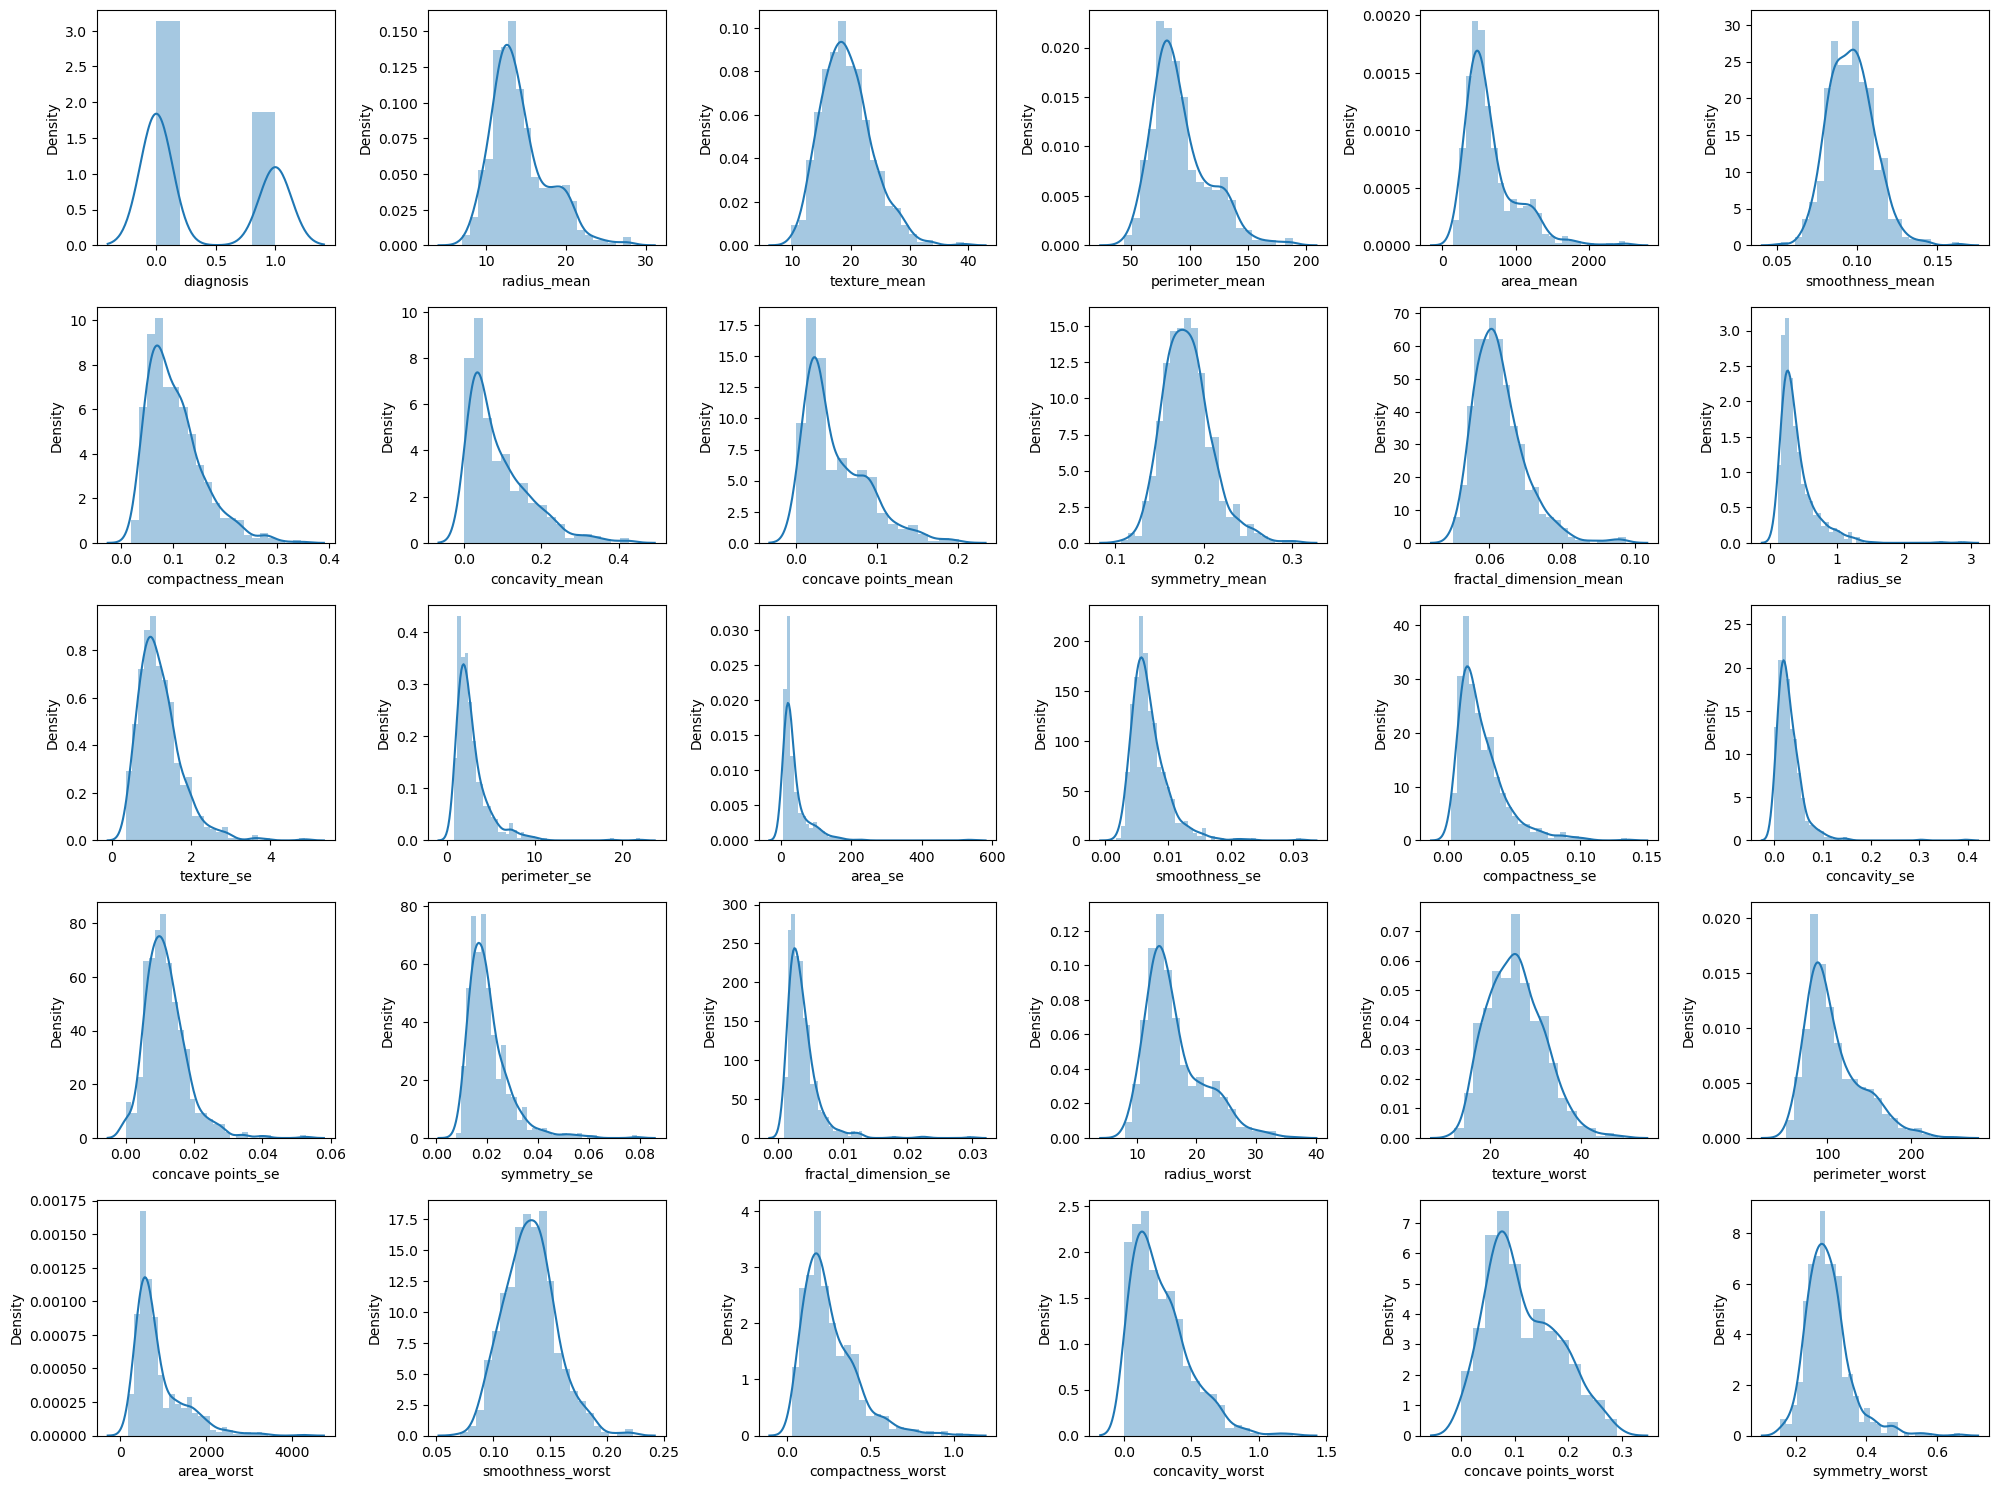

In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [17]:
# # Create pairplot of all ten mean features
# sns.pairplot(df, 
#              hue="diagnosis",
#              palette="dark",
#              plot_kws=dict(alpha=0.55))
# plt.show()

diagnosis
0    357
1    212
Name: count, dtype: int64


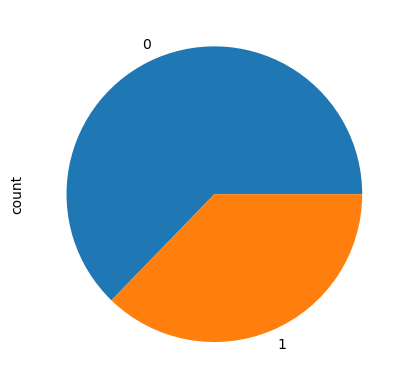

In [18]:
# Show number of malignant (M) and benign (B) values in diagnosis target feature
# Display as pie chart

print(df["diagnosis"].value_counts())

df["diagnosis"].value_counts().plot(kind="pie")
plt.show()

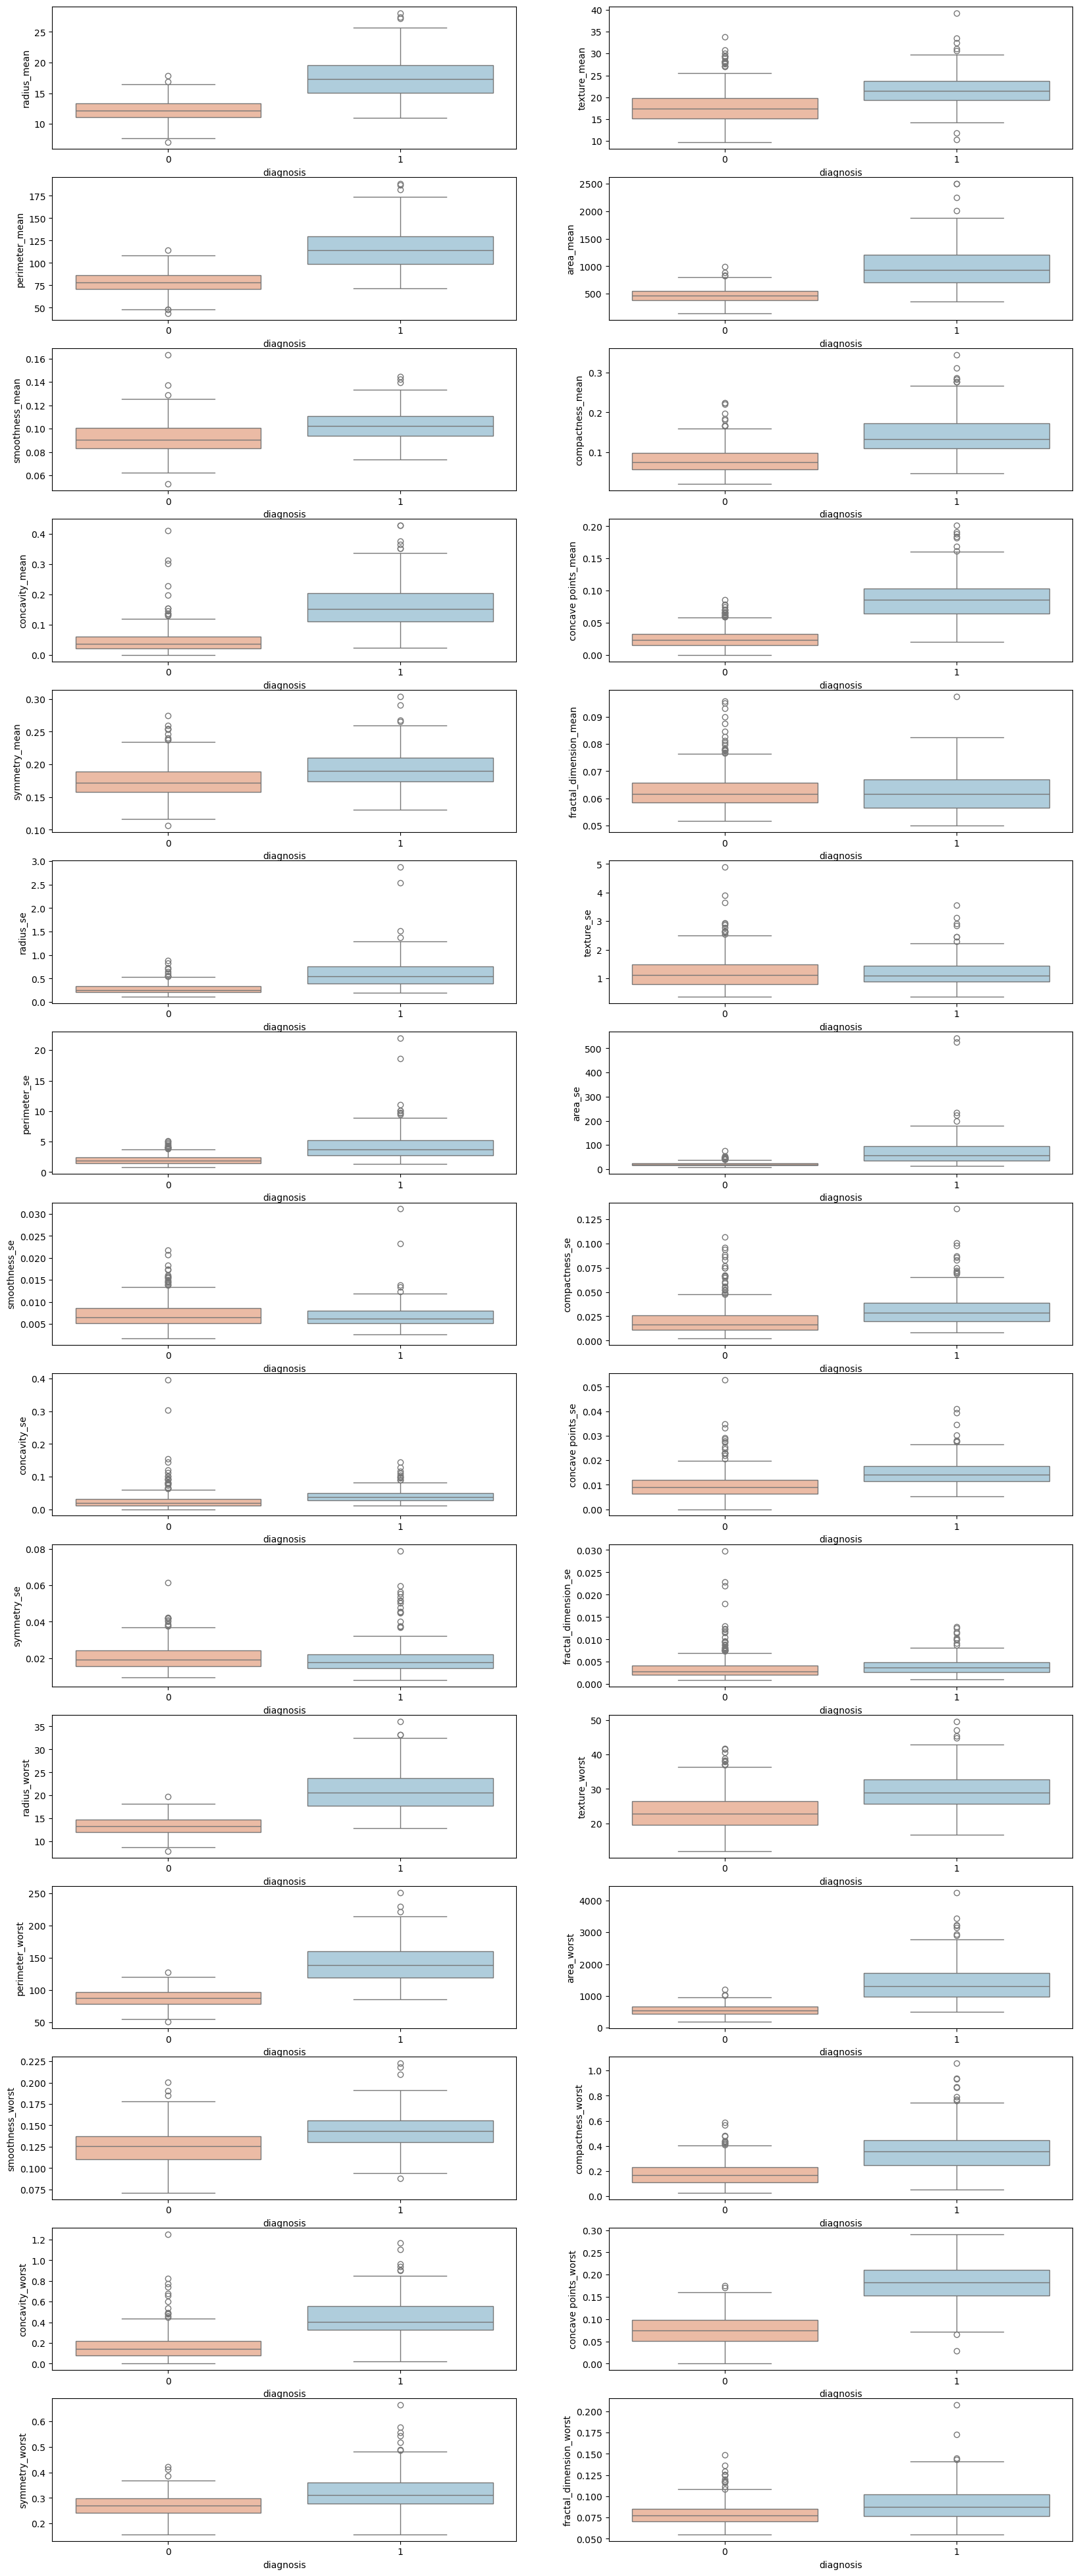

In [19]:
# checking numerical data count
nume_cols=[ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
           'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se',
           'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
           'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig=plt.figure(figsize=(20,50))
for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(15,2,i+1)
    sns.boxplot(y=df[col],x=df['diagnosis'], palette = "RdBu")
plt.show()

<a id="modeling"></a>
# 5️⃣ ㅣCorrelation

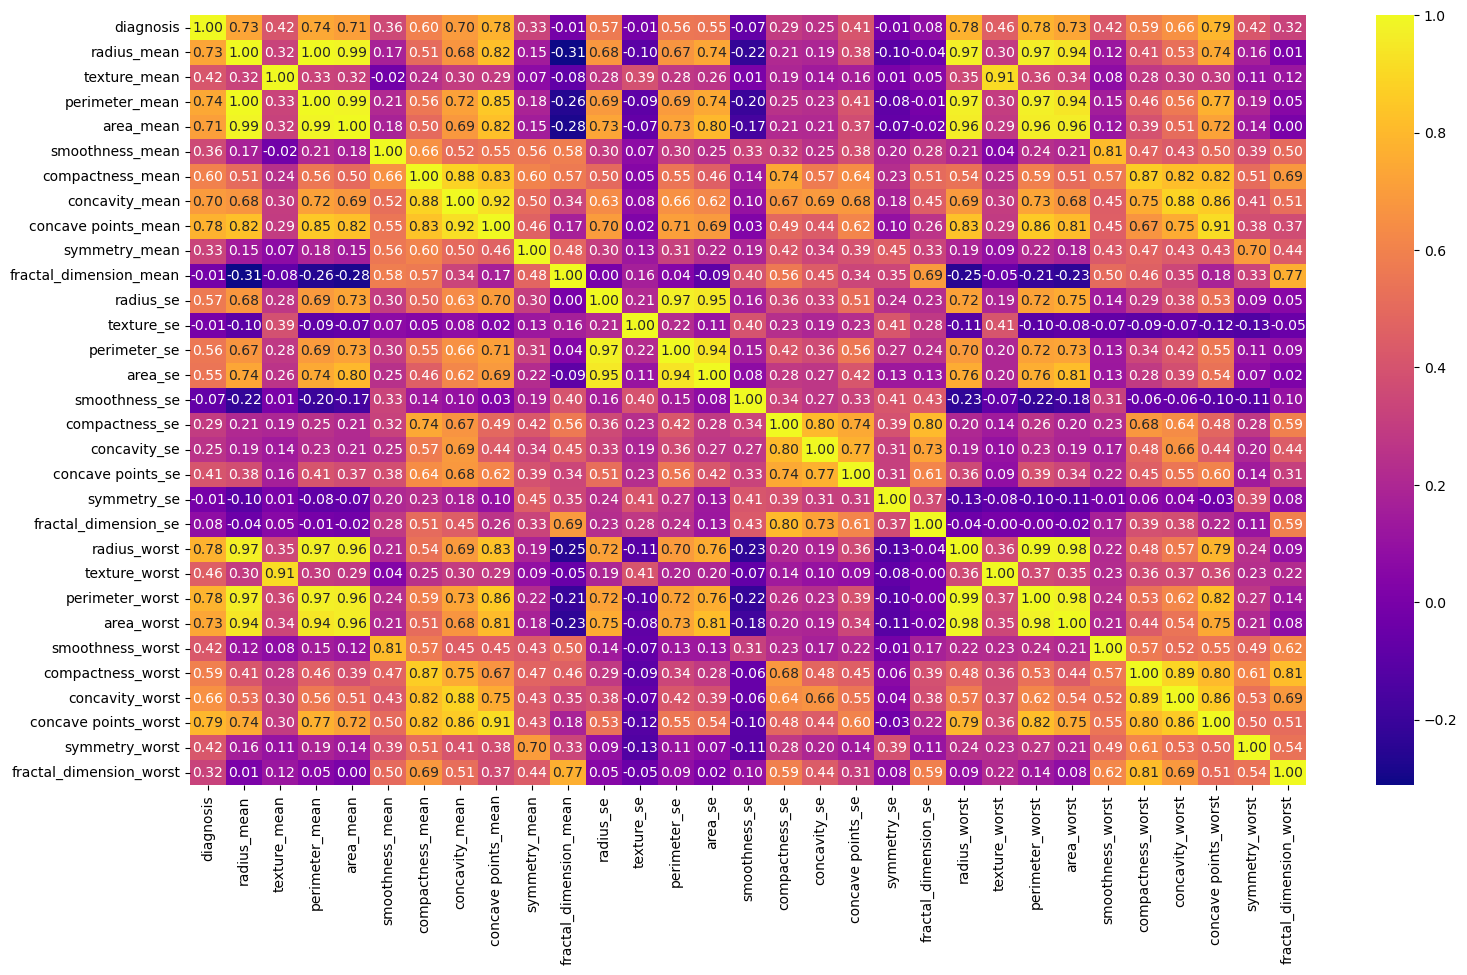

In [20]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), cmap= 'plasma',annot = True , fmt='.2f' )
plt.show()

In [21]:
# checking correlation of independent variable with dependent variable i.e diagnosis
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

<a id="summary"></a>
# 6️⃣ㅣ Model Building

In [22]:
# independant variables
x=df.drop(["diagnosis"],axis=1)
y = df["diagnosis"].values.reshape(-1,1)  #target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of x : (569, 30) 
shape of y : (569, 1)


In [23]:
# Returning the classification metrics for multi_class probelm.

def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))
    
def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(metrics.accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(metrics.precision_score(y_true, y_pred, average = 'micro'), 3))
    print(f'Recall    : ', round(metrics.recall_score(y_true, y_pred, average = 'micro'), 3))
    print(f'f1        : ', round(metrics.f1_score(y_true, y_pred, average = 'micro'), 3))  

### 5 K-Nearest Neighbour

In [24]:
#split X and y in training and test set in 75:25 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
k=20   #1 to 20
Acc= np.zeros((k))
for i in range (1, k+1):
    KNN= KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train.ravel())
    y_pred=KNN.predict (x_test)
    Acc[i-1]=metrics.accuracy_score(y_test, y_pred)
    
Acc

array([0.91608392, 0.93706294, 0.92307692, 0.93706294, 0.93706294,
       0.95104895, 0.94405594, 0.95804196, 0.95804196, 0.95804196,
       0.95804196, 0.95804196, 0.95804196, 0.95804196, 0.95804196,
       0.95804196, 0.95804196, 0.95804196, 0.95804196, 0.95804196])

In [26]:
print(np.max(Acc))
print(np.min(Acc))

0.958041958041958
0.916083916083916


### MODEL WITH GRIDSEARCHCV - Hyper parameter tuning

In [27]:
parametrs={'n_neighbors': range(1,50)}
grid_kn= GridSearchCV(estimator=KNN ,  #model
                       param_grid=parametrs, #range k
                       scoring='accuracy',#strategy to evaluate the performance
                        #of the csoss_validation model on the test set
                       cv=10,   # cross_validation generator
                       verbose=1,  #Time of calculate
                       n_jobs=-1)  # help to CPU
grid_kn.fit(x_train,y_train.ravel())

Fitting 10 folds for each of 49 candidates, totalling 490 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsCla..._neighbors=20)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': range(1, 50)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidat

In [28]:
grid_kn.best_params_

{'n_neighbors': 7}

In [29]:
#split X and y in training and test set in 70:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [30]:
k=7
KNN= KNeighborsClassifier(n_neighbors=k)
KNN.fit(x_train,y_train.ravel())
y_pred=KNN.predict (x_test)

### Evaluation

In [31]:
Report(y_test , y_pred)

Accuracy : 94.73684210526315% 

Confusion Matrix : 

[[64  3]
 [ 3 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [32]:
print('f1 score is:', metrics.f1_score(y_test, y_pred, average="macro"))

f1 score is: 0.9456970466814862


In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

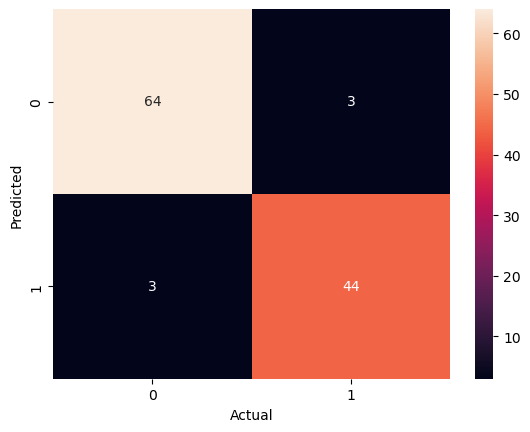

In [34]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Conclusions
We KNN algorithms to predict whether an instance of a breast tumor is benign or malignant. In the process, we created models with default parameters and then used techniques to optimize them.

Due to the medical nature of the dataset, we stressed on the importance of having high accuracy but also low false negative (FN) predictions, as this would save lives. We conclude that the SVM model is the optimal classification model for the Wisconsin breast cancer dataset (at least out of the models considered in this notebook), with an average accuracy of 0.98, a Malignant precision of 0.98 and only 1 FN prediction.

#### Classification report: macro vs weighted

In the context of the classification_report in scikit-learn, "macro average" and "weighted average" are two different ways of averaging the performance metrics (precision, recall, and F1-score) across all classes in a classification problem. Here's a breakdown of each:

##### Macro Average:

- Macro Average Precision: The unweighted average of the precision of all classes.
- Macro Average Recall: The unweighted average of the recall of all classes.
- Macro Average F1-Score: The unweighted average of the F1-score of all classes.

In essence, macro averaging treats all classes equally, regardless of their support (the number of instances for each class). This can be useful when you want to measure the performance of your model uniformly across all classes, without giving more importance to any particular class.

##### Weighted Average

- Weighted Average Precision: The average precision of all classes, weighted by the number of instances for each class.
- Weighted Average Recall: The average recall of all classes, weighted by the number of instances for each class.
- Weighted Average F1-Score: The average F1-score of all classes, weighted by the number of instances for each class.

In weighted averaging, the performance metrics are averaged in a way that gives more importance to classes with more instances. This method is useful when you want to take into account the class distribution and ensure that the performance is reflective of the actual class proportions in your dataset.



Macro Average Precision: (0.90 + 0.75 + 0.60) / 3 = 0.75
Macro Average Recall: (0.80 + 0.85 + 0.70) / 3 = 0.78

Weighted Average Precision: (0.90 * 50 + 0.75 * 30 + 0.60 * 20) / (50 + 30 + 20) = 0.78
Weighted Average Recall: (0.80 * 50 + 0.85 * 30 + 0.70 * 20) / (50 + 30 + 20) = 0.80